In [19]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from datetime import datetime

In [2]:
df = pd.read_csv('training.csv')

In [3]:
df_shape = df.shape
print(df_shape)

(4017729, 7)


In [4]:
cols = df.columns
print(cols)

Index(['_source.timestamp', 'Microwave', 'General', 'Refrigerator',
       'Washing Machine', 'Shower', 'Air Fryer'],
      dtype='object')


In [5]:
df.describe()

,Microwave,General,Refrigerator,Washing Machine,Shower,Air Fryer
count,4.017729e+06,4.017729e+06,4.017729e+06,4.017729e+06,4.017729e+06,4.017729e+06
mean,4.749255e-01,2.159587e+02,8.379256e+01,8.943347e-01,2.584772e+01,1.781884e+00
std,2.507039e+01,4.509970e+02,9.798154e+01,1.634875e+01,3.636687e+02,4.911666e+01
min,0.000000e+00,2.026000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,0.000000e+00,9.543000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,0.000000e+00,1.592200e+02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,0.000000e+00,2.597700e+02,1.976400e+02,0.000000e+00,0.000000e+00,0.000000e+00
max,1.488620e+03,8.172870e+03,1.164670e+03,6.969800e+02,5.964740e+03,1.450350e+03


In [6]:
df.dtypes

_source.timestamp     object
Microwave            float64
General              float64
Refrigerator         float64
Washing Machine      float64
Shower               float64
Air Fryer            float64
dtype: object

In [7]:
df['_source.timestamp'] = df['_source.timestamp'].apply(lambda x: datetime.strptime(x, '%Y-%m-%d %H:%M:%S'))

In [8]:
df = df.rename(columns={'_source.timestamp': 'date-time'})

In [9]:
df.dtypes

date-time          datetime64[ns]
Microwave                 float64
General                   float64
Refrigerator              float64
Washing Machine           float64
Shower                    float64
Air Fryer                 float64
dtype: object

In [10]:
#df.set_index('date-time' , inplace=True)

In [11]:
display(df)

,date-time,Microwave,General,Refrigerator,Washing Machine,Shower,Air Fryer
0,2022-10-03 18:43:45,0.0,77.84000,0.0,0.0,0.0,0.0
1,2022-10-03 18:43:50,0.0,79.11000,0.0,0.0,0.0,0.0
2,2022-10-03 18:43:55,0.0,79.06000,0.0,0.0,0.0,0.0
3,2022-10-03 18:44:00,0.0,78.97000,0.0,0.0,0.0,0.0
4,2022-10-03 18:44:05,0.0,78.63000,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...
4017724,2023-05-31 21:30:10,0.0,211.76001,0.0,0.0,0.0,0.0
4017725,2023-05-31 21:30:15,0.0,205.26999,0.0,0.0,0.0,0.0
4017726,2023-05-31 21:30:20,0.0,205.37000,0.0,0.0,0.0,0.0
4017727,2023-05-31 21:30:25,0.0,205.22000,0.0,0.0,0.0,0.0


In [22]:
for col in df.columns :
    if(col!='date-time') :
        df[col] = (df[col] - df[col].min()) / (df[col].max()-df[col].min()) 
display(df)

,date-time,Microwave,General,Refrigerator,Washing Machine,Shower,Air Fryer
0,2022-10-03 18:43:45,0.0,0.007063,0.0,0.0,0.0,0.0
1,2022-10-03 18:43:50,0.0,0.007219,0.0,0.0,0.0,0.0
2,2022-10-03 18:43:55,0.0,0.007212,0.0,0.0,0.0,0.0
3,2022-10-03 18:44:00,0.0,0.007201,0.0,0.0,0.0,0.0
4,2022-10-03 18:44:05,0.0,0.007160,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...
4017724,2023-05-31 21:30:10,0.0,0.023489,0.0,0.0,0.0,0.0
4017725,2023-05-31 21:30:15,0.0,0.022693,0.0,0.0,0.0,0.0
4017726,2023-05-31 21:30:20,0.0,0.022706,0.0,0.0,0.0,0.0
4017727,2023-05-31 21:30:25,0.0,0.022687,0.0,0.0,0.0,0.0


In [23]:
df.to_csv('scaled_training.csv', index=False)

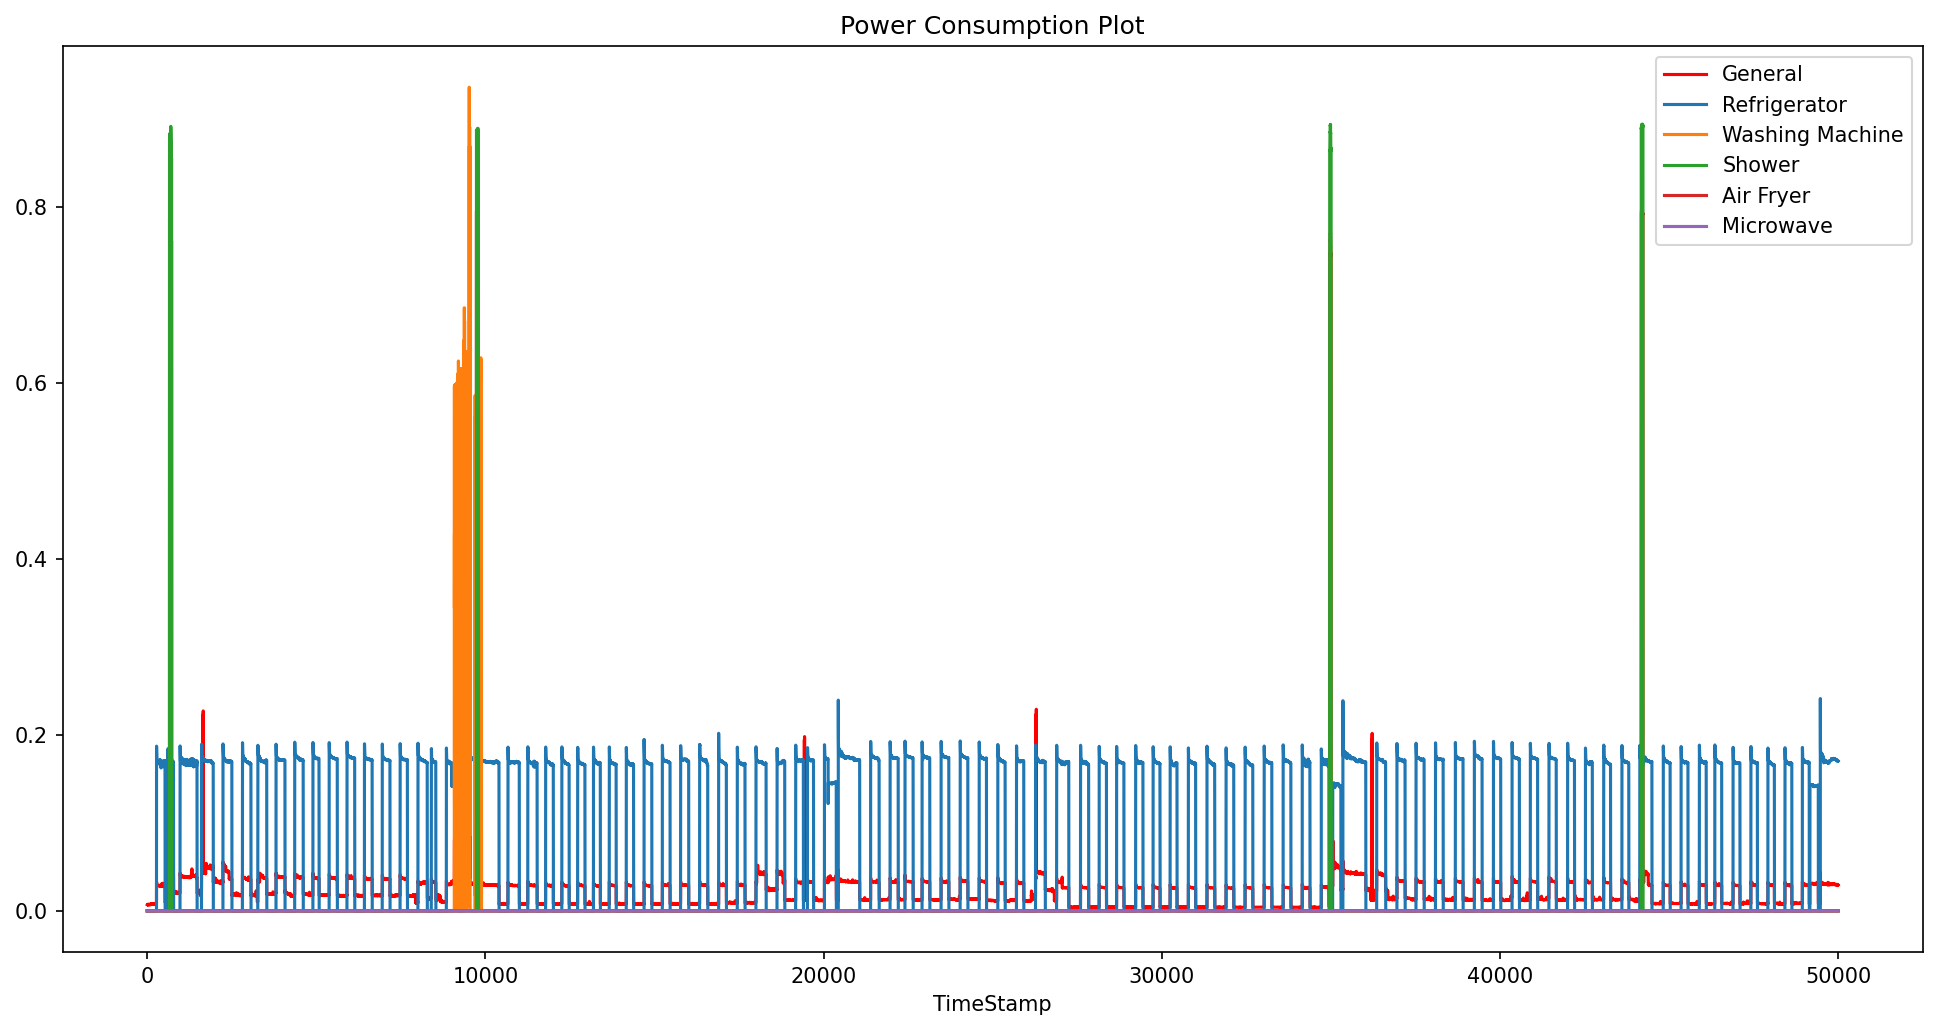

In [42]:
# to set the plot size
plt.figure(figsize=(16, 8), dpi=150)

# using plot method to plot open prices.
# in plot method we set the label and color of the curve.

df['General'].head(50000).plot(label='General', color='red')
df['Refrigerator'].head(50000).plot(label='Refrigerator')
df['Washing Machine'].head(50000).plot(label='Washing Machine')
df['Shower'].head(50000).plot(label='Shower')
df['Air Fryer'].head(50000).plot(label='Air Fryer')
df['Microwave'].head(50000).plot(label='Microwave')

# adding title to the plot
plt.title('Power Consumption Plot')

# adding Label to the x-axis
plt.xlabel('TimeStamp')

# adding legend to the curve
plt.legend()

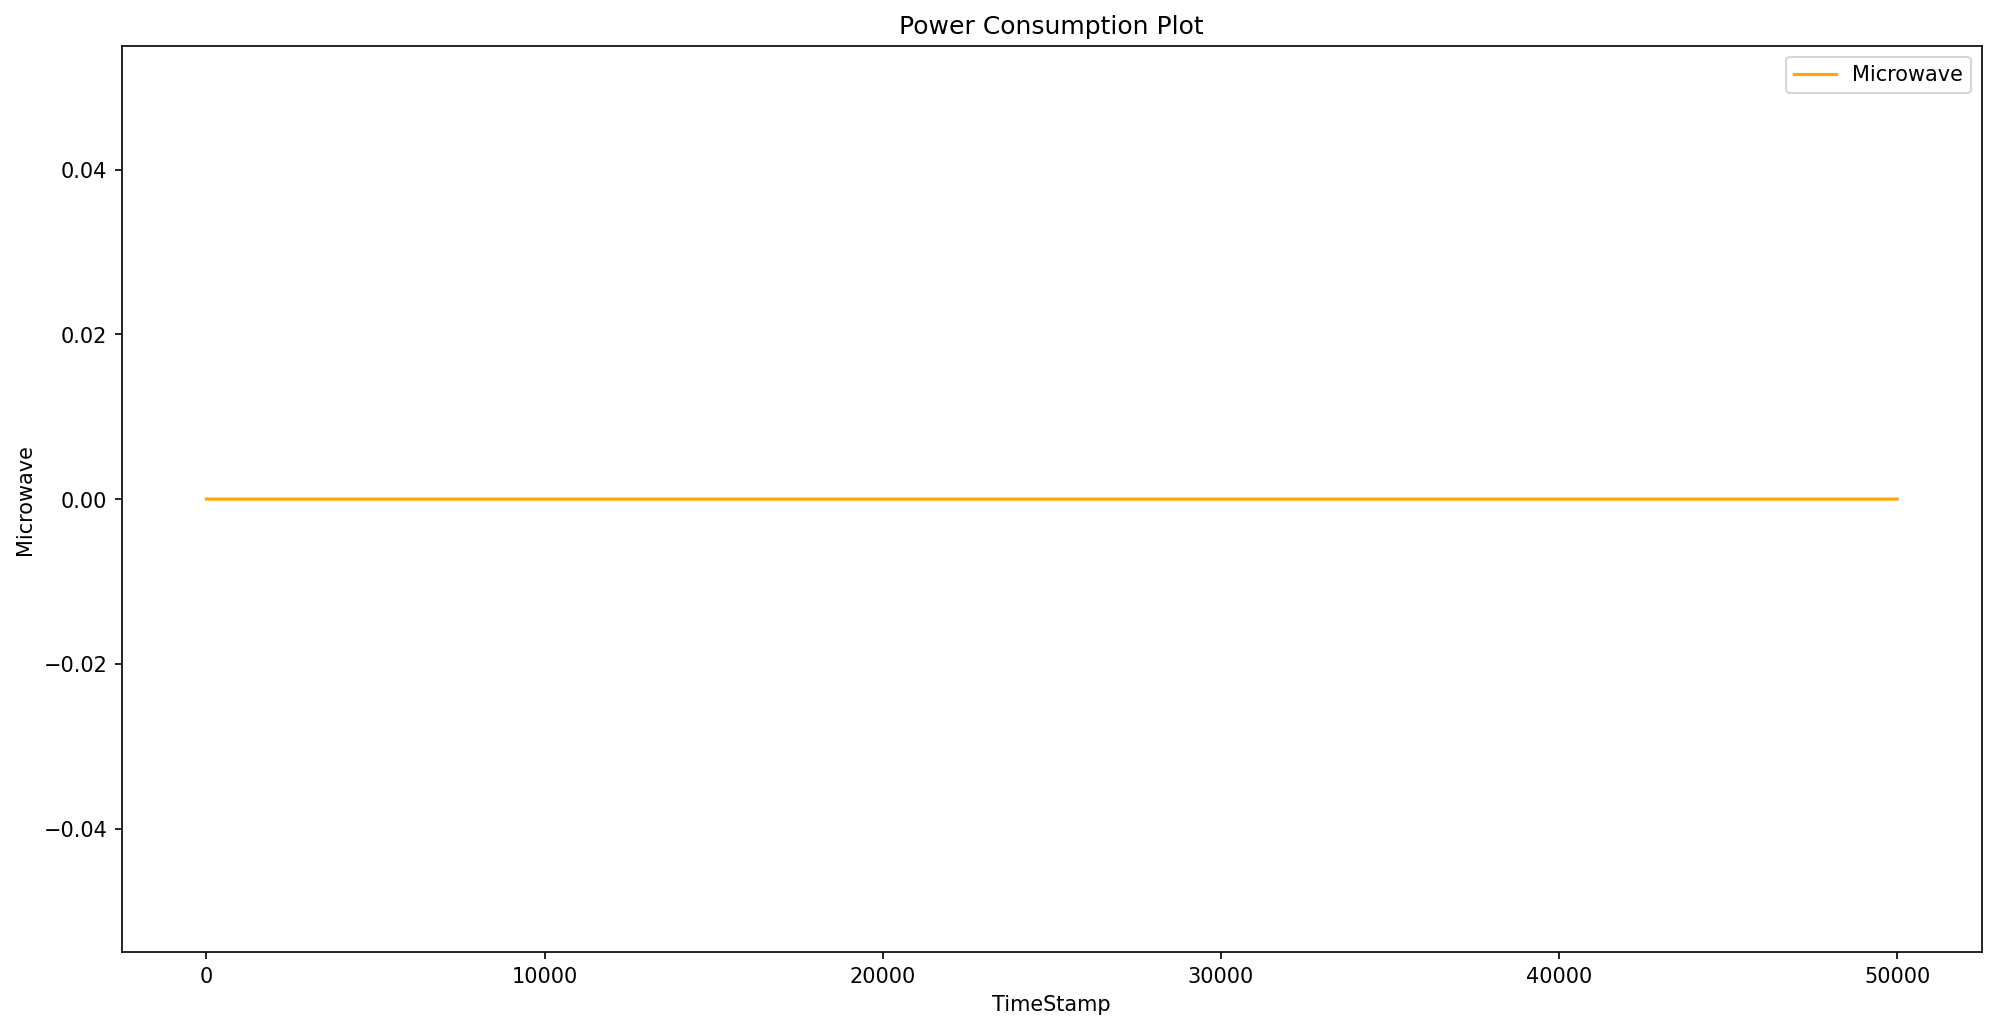

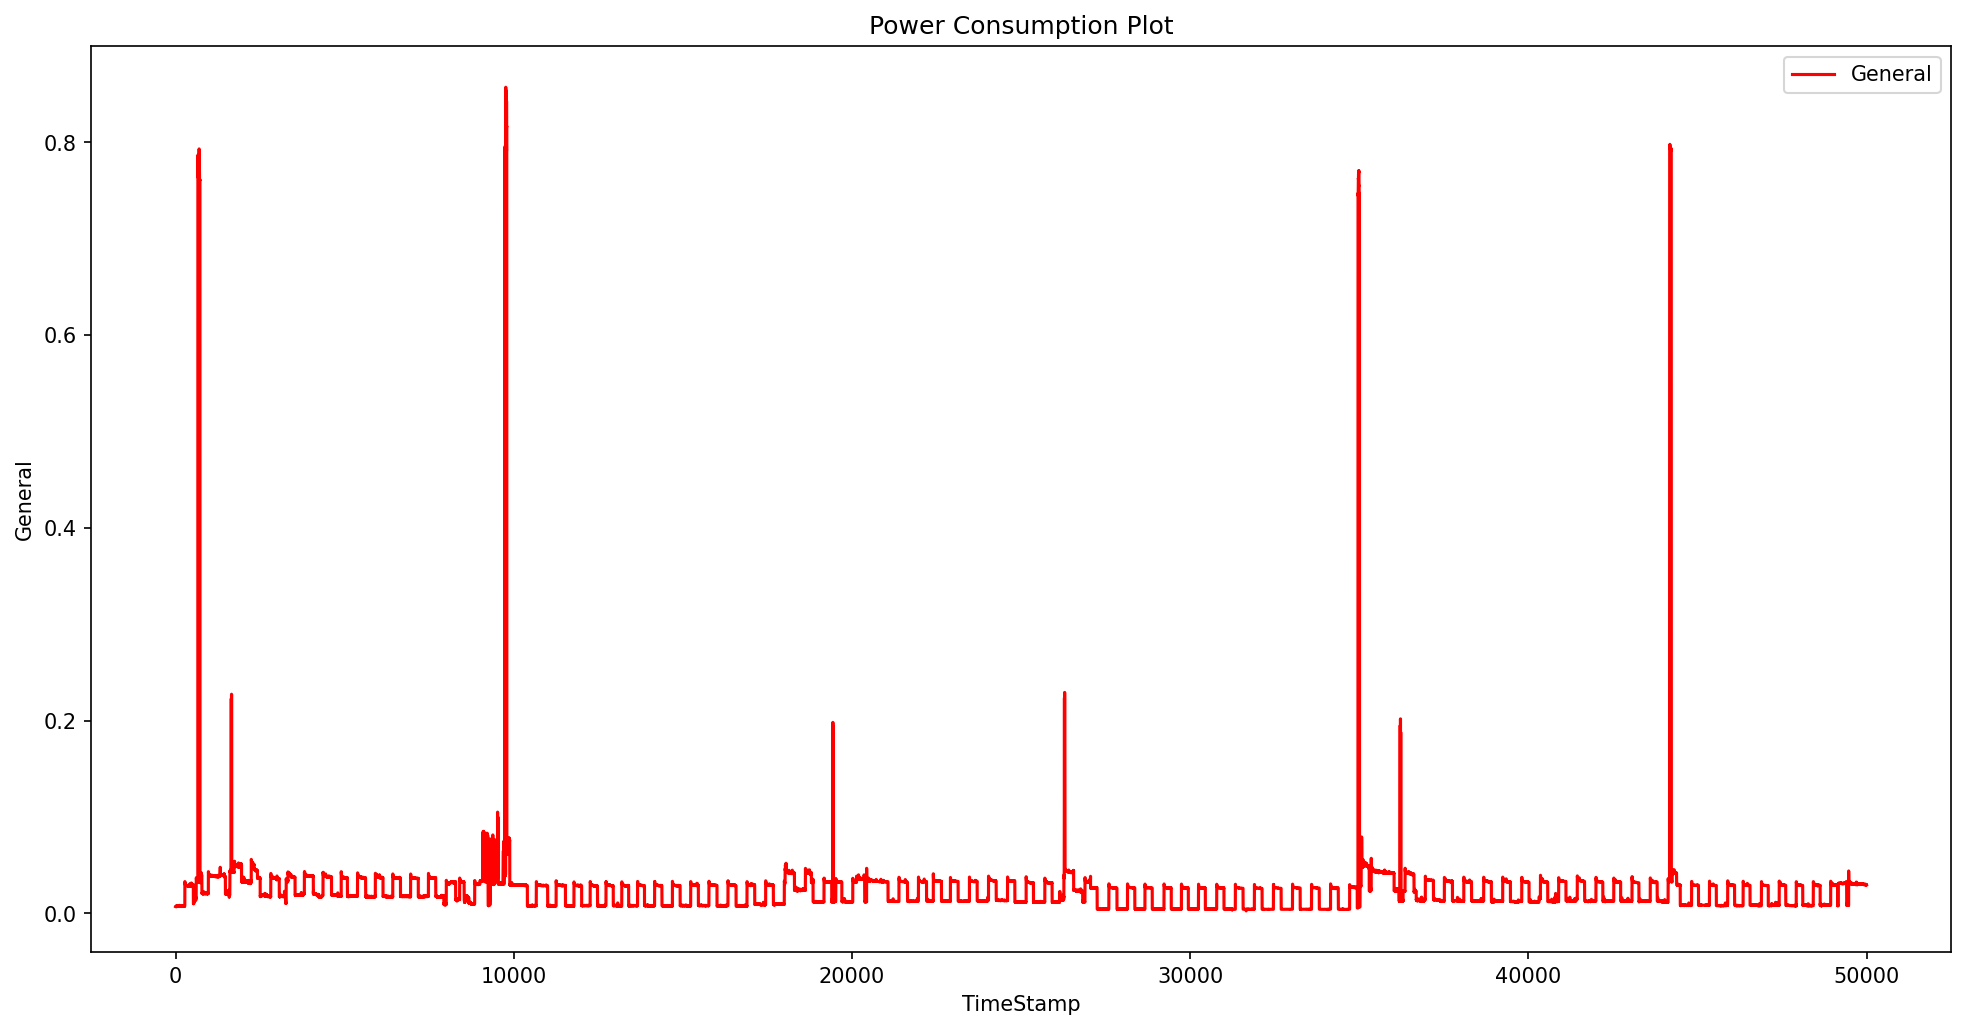

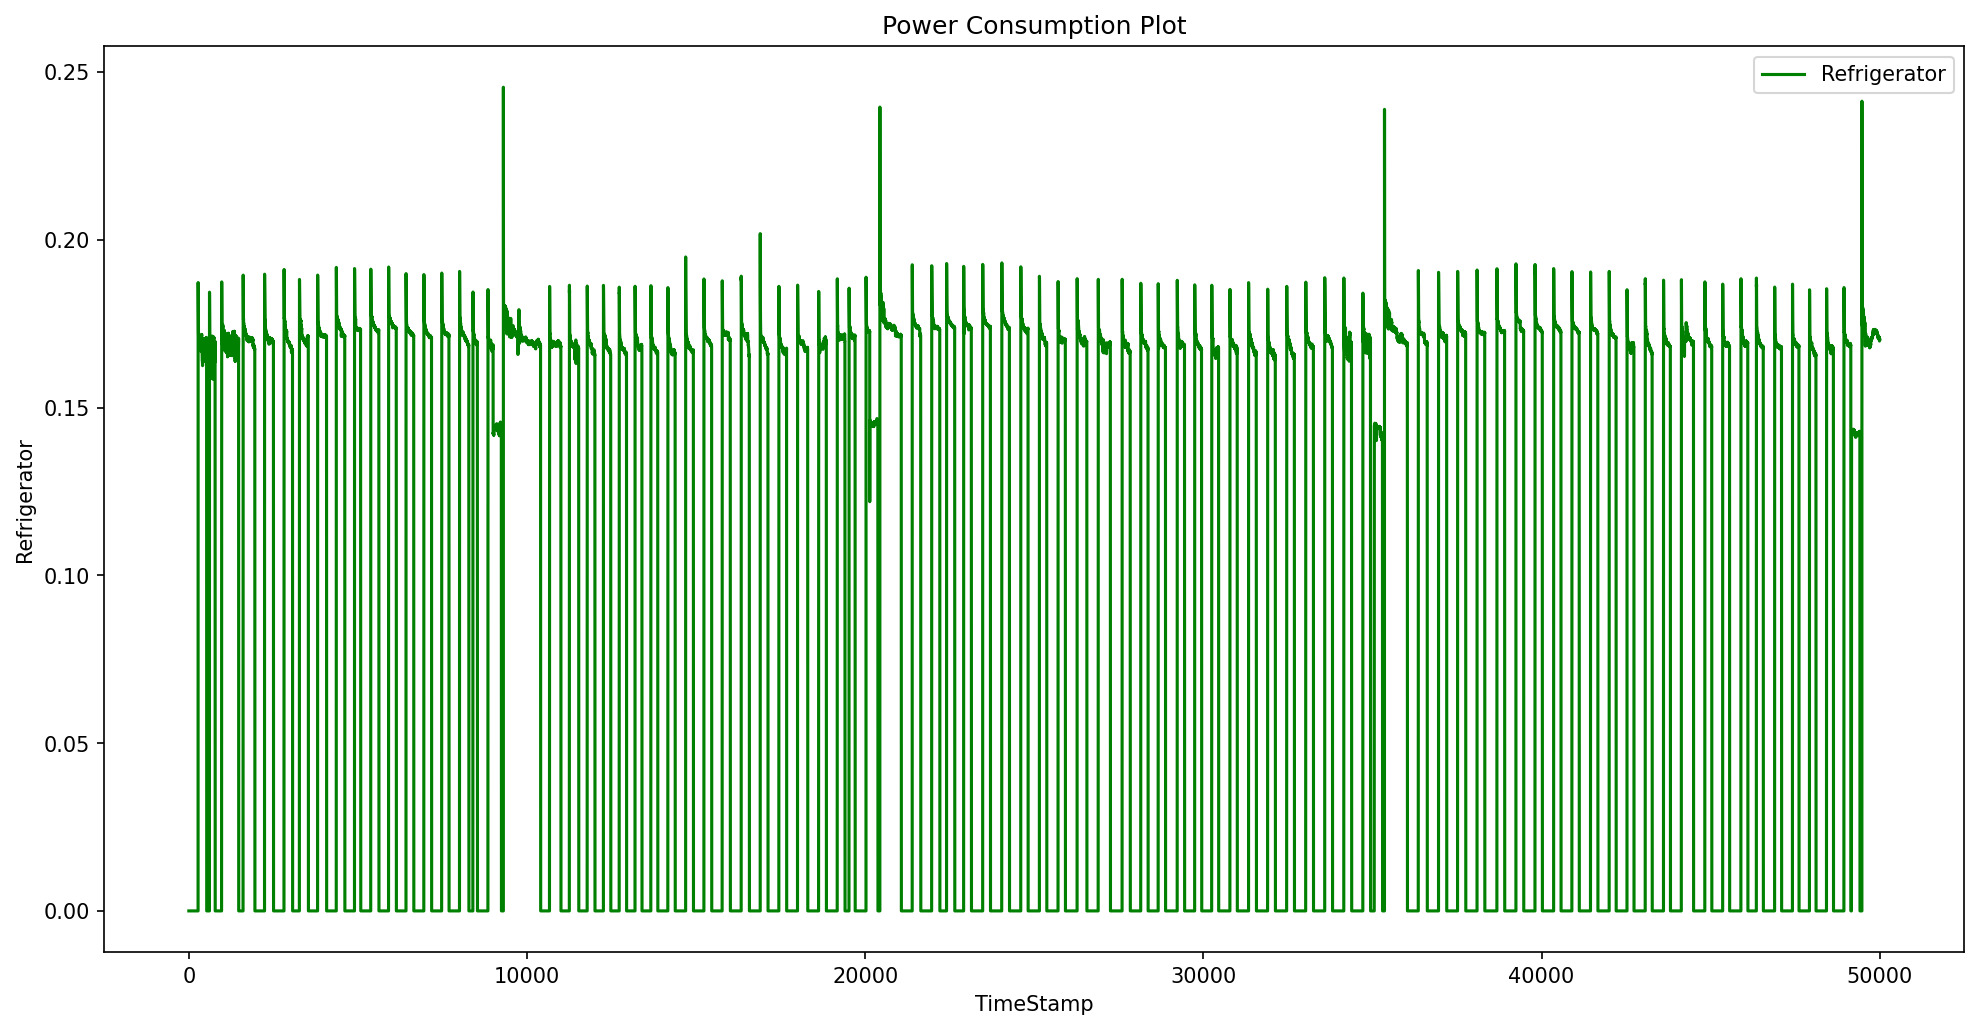

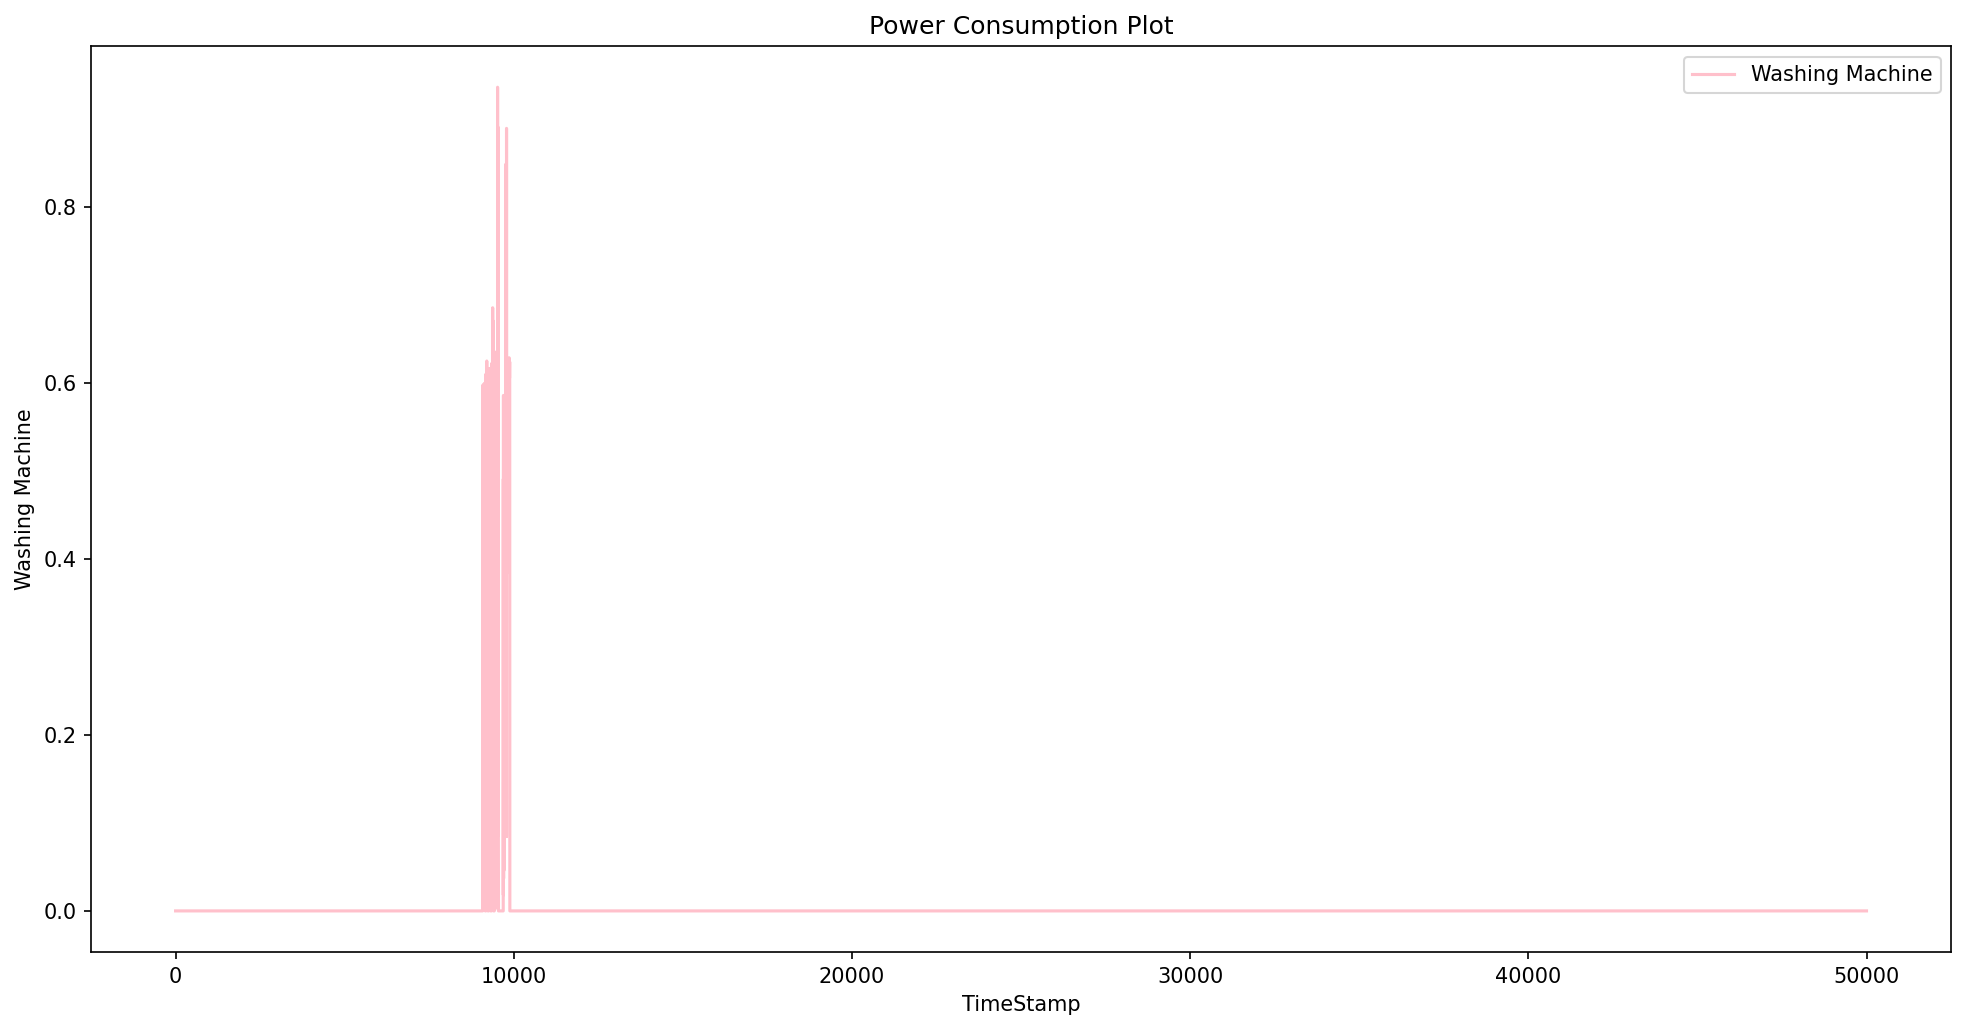

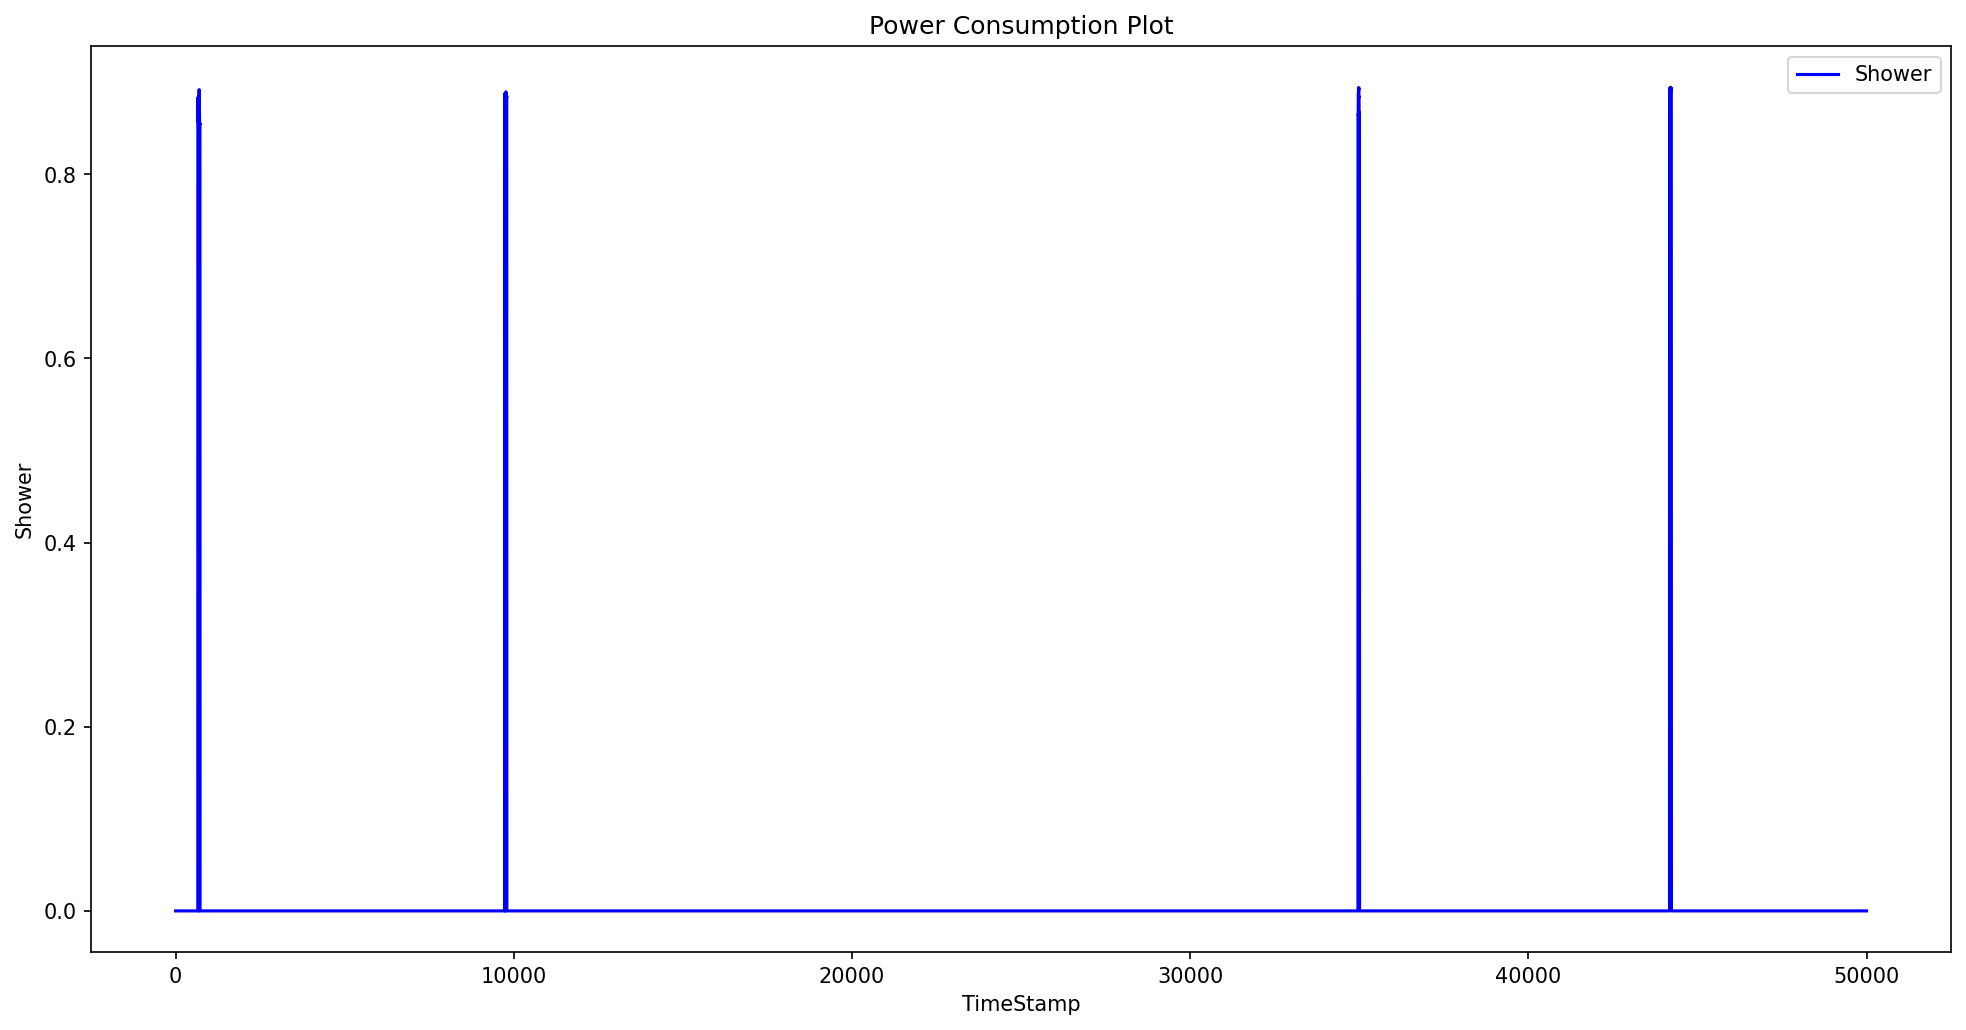

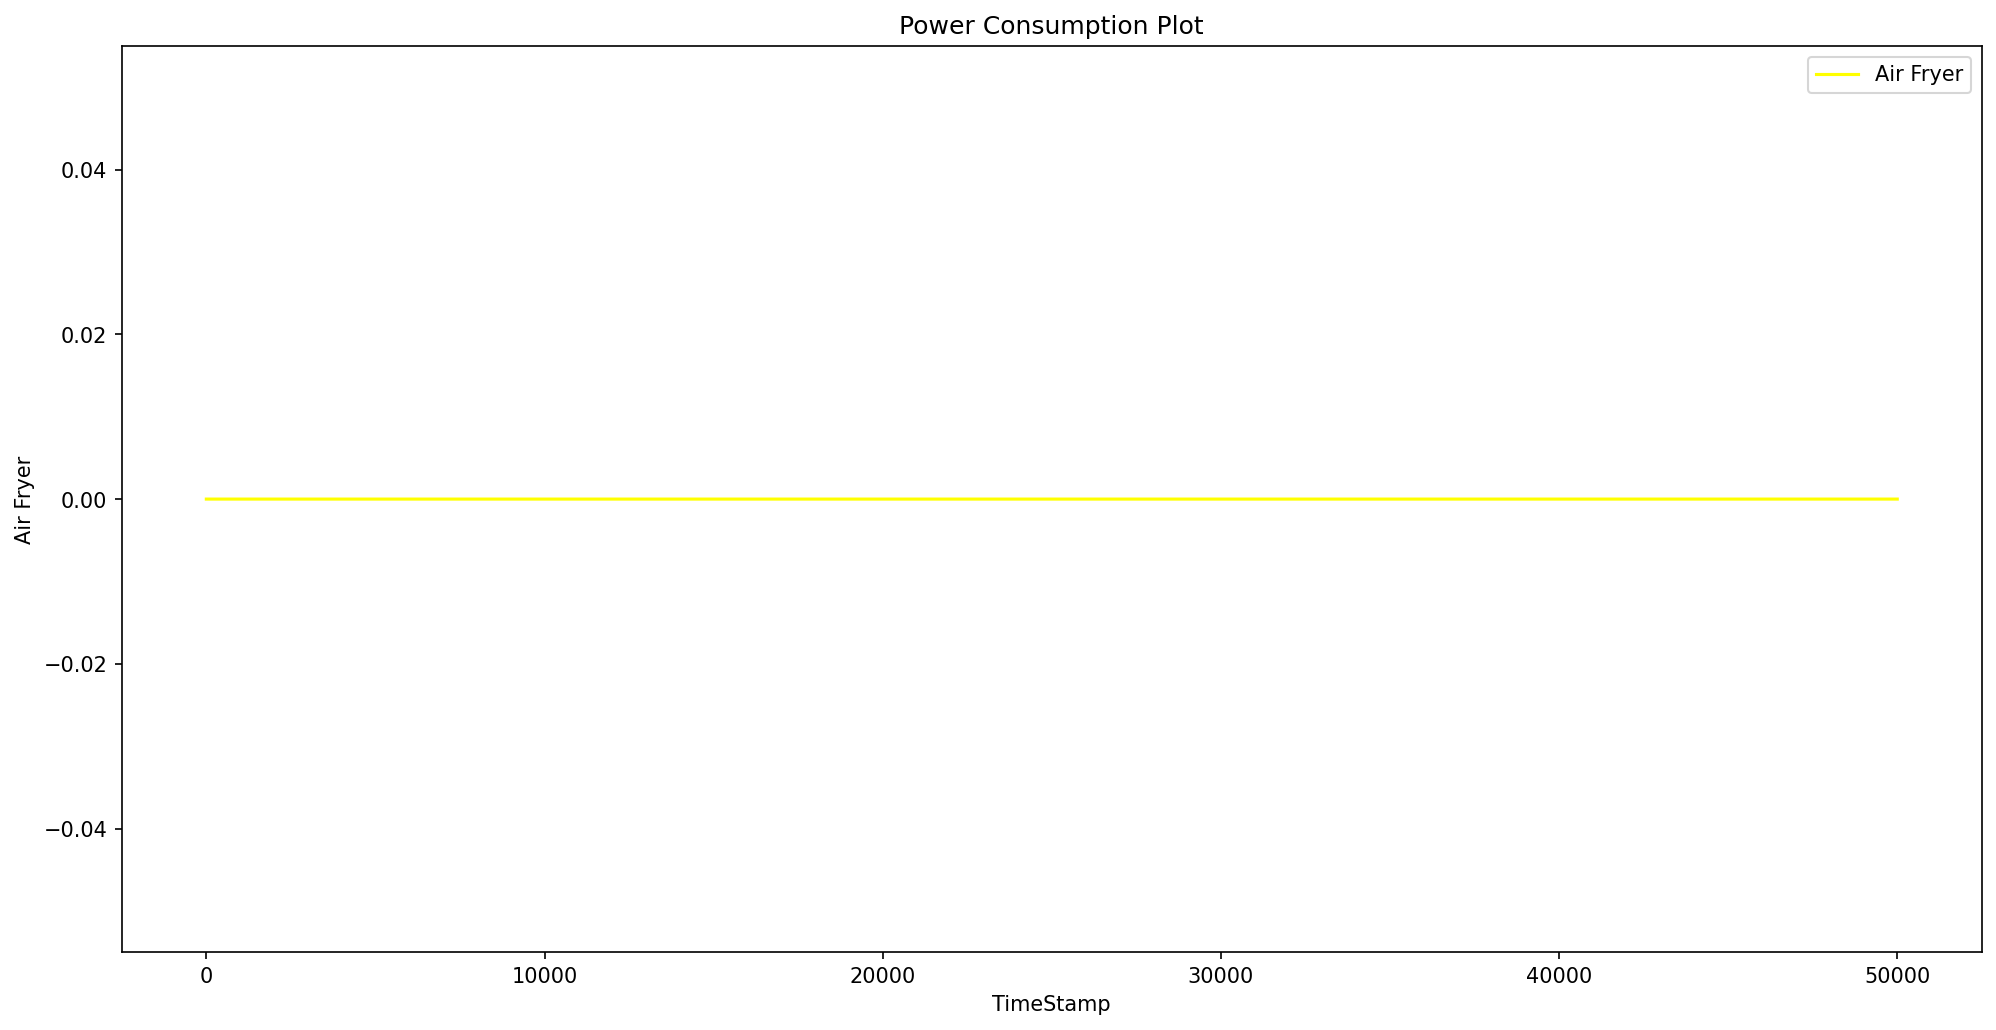

In [38]:
# to set the plot size


# using plot method to plot open prices.
# in plot method we set the label and color of the curve.
i=0
colors = ['orange' , 'red' , 'green' , 'pink' , 'blue' , 'yellow']
for col in df.columns:
    if(col!='date-time') :
        plt.figure(figsize=(16, 8), dpi=150)
        df[col].head(50000).plot(label=col, color=colors[i])
        plt.title('Power Consumption Plot')
        plt.xlabel('TimeStamp')
        plt.ylabel(col)
        plt.legend()
        plt.show()
        i+=1



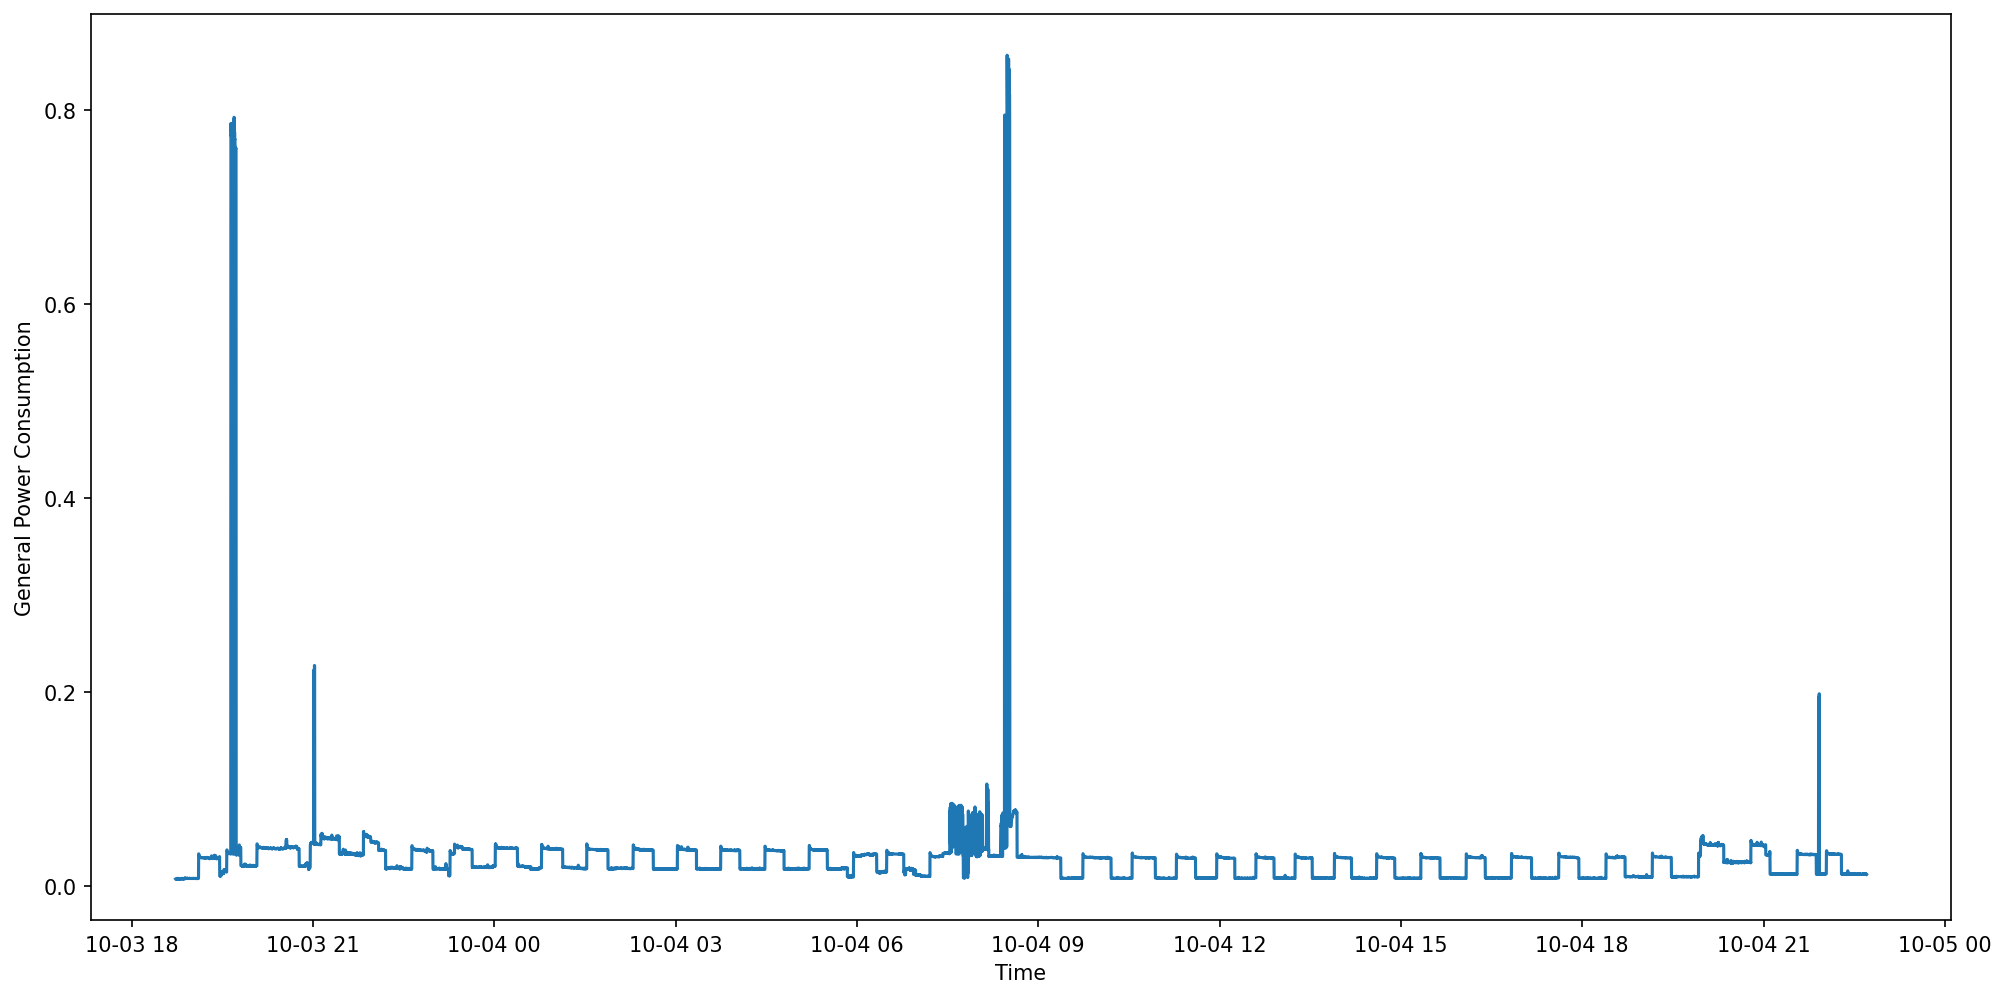

In [53]:
plt.figure(figsize=(16, 8), dpi=150)
plt.plot(df["date-time"].head(20000) , df["General"].head(20000))
plt.xlabel("Time")
plt.ylabel("General Power Consumption")
plt.show()